# Importing libraries

In [14]:
import pandas as pd 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Loading data

In [2]:
data = pd.read_csv('/kaggle/input/heart-attack-risk-in-youth-vs-adult-in-pakistan/heart_attack_youth_vs_adult_pakistan.csv')

In [3]:
data.head(3)

,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up
0,74,Female,Urban,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,...,162,52,No,Abnormal,102.0,No,Yes,Ongoing,Yes,Irregular
1,68,Male,Urban,38.3,Yes,Yes,No,276.3,High,Healthy,...,150,97,No,Normal,186.9,Yes,No,Deceased,Yes,Regular
2,50,Male,Urban,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,...,98,67,Yes,Normal,71.4,No,Yes,Ongoing,No,NaN


# Check for missing values

In [5]:
data.isna().sum()

Age                         0
Gender                      0
Region                      0
BMI                         0
Smoker                      0
Diabetes                    0
Hypertension                0
Cholesterol_Level           0
Physical_Activity           0
Diet                        0
Family_History              0
Stress_Level                0
Alcohol_Consumption         0
Drug_Use                    0
Sleep_Hours                 0
Blood_Pressure              0
Heart_Rate                  0
Chest_Pain                  0
ECG_Results                 0
Blood_Sugar                 0
Angina                      0
Cardiac_Arrest              0
Recovery_Status             0
Medication                  0
Follow_Up              133631
dtype: int64

# Categorical to Numerical

In [6]:
Categorical_columns = data.select_dtypes(include=['object', 'category']).columns

In [7]:
def mapping_to_num(data, column):
    mapping = {category: idx for idx, category in enumerate(data[column].astype('category').cat.categories)}
    data[column] = data[column].map(mapping)
    return data, mapping

In [8]:
mappings_dict = {}
columns_to_map = Categorical_columns
for col in columns_to_map:
    data, mapping = mapping_to_num(data, col)
    mappings_dict[col] = mapping

# Imputing Missing Data

In [15]:
imputer = KNNImputer(n_neighbors=5)
data1 = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Data Splitting

In [16]:
X = data1.drop(columns=['Cardiac_Arrest'])
y = data1['Cardiac_Arrest']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model

In [18]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Classification Report

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     59818
         1.0       0.86      0.85      0.85     60181

    accuracy                           0.85    119999
   macro avg       0.85      0.85      0.85    119999
weighted avg       0.85      0.85      0.85    119999



# Confusion Matrix

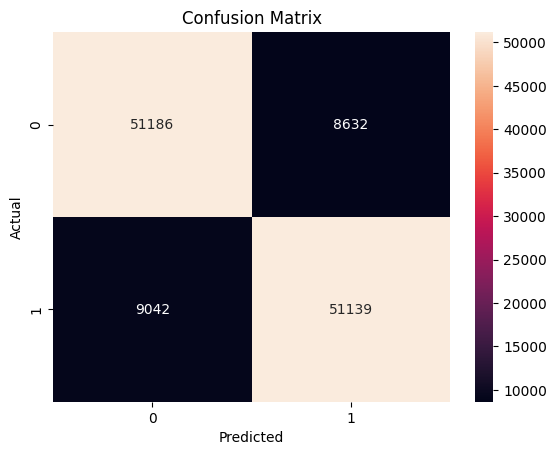

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()